<a href="https://colab.research.google.com/github/RonChits/Default-Probability/blob/main/Default_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data importing.

>Modules to be used.

In [4]:
import pandas as pd
import numpy as np
import re
import nest_asyncio
import xgboost
# import uvicorn
# import category_encoders as ce
# import seaborn as sns
# import nominatim
import geopy
import string
import pickle
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
# sampling techniques.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# classifiers.
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# transformers.
from sklearn.preprocessing import StandardScaler,  OneHotEncoder, LabelEncoder, FunctionTransformer

# metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, ConfusionMatrixDisplay,precision_score, f1_score, roc_curve , auc, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

#http communications.
# from fastapi import FastAPI , Body, HTTPException, Request, status
# from fastapi.encoders import jsonable_encoder
# from fastapi.exceptions import RequestValidationError
# from fastapi.responses import JSONResponse

# extras.
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from pydantic import BaseModel
from tabulate import tabulate
import dill
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization

### Assigning to dataframe csv to df.

---

In [5]:
df = pd.read_csv("data_science_competition_2024.csv", index_col=0)

---
>Gaining a basic understanding of the structure and content of our dataframe, which is essential for further data exploration and analysis.

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   disbursemet_date      100000 non-null  object 
 3   currency              100000 non-null  object 
 4   country               99900 non-null   object 
 5   sex                   100000 non-null  object 
 6   is_employed           100000 non-null  bool   
 7   job                   95864 non-null   object 
 8   location              99405 non-null   object 
 9   loan_amount           100000 non-null  float64
 10  number_of_defaults    100000 non-null  int64  
 11  outstanding_balance   100000 non-null  float64
 12  interest_rate         100000 non-null  float64
 13  age                   100000 non-null  int64  
 14  number_of_defaults.1  100000 non-null  int64  
 15  remain

(100000, 20)

>

---
>Gaining a basic understanding of the structure and content of our dataframe, which is essential for further data exploration and analysis.

In [7]:
df.head(5)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


#### Cleaning of the data with aspects observed(a comprehensive/shorter way).



> Summarry of data Cleaning of dataframe of loans

In [ ]:
# Summarry of data Cleaning of dataframe of loans
def wrangle(df):
    def clean_currency(value):
        return re.sub(r'\$', '', value)
    def empty_strings(series):
        return series.replace(r'^\s*$', 'other', regex = True)

    df['currency'] = df['currency'].astype(str)
    df['marital_status'] = df['marital_status'].astype(str)
        #cleaning dollar sign on currency
    df['currency'] = df['currency'].apply(clean_currency)

        #cleaning empty strings on marital status
    df['marital_status'] = empty_strings(df['marital_status'])
        # Droping the duplicates rowwise
    df=df.drop_duplicates()

        #Droping null values
    df=df.dropna(how='any')


    df= df.rename(columns={"remaining term" : "remaining_term"})
    df= df.rename(columns={"Loan Status" : "Loan_Status"})

        # Using Pandas to change their datatypes
    df['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'],
                                              format ='%Y %m %d')
    df['remaining_term']= pd.to_numeric(df['remaining_term'], errors= 'coerce')

        #removing outliers
        # remaining term
    df = df[df["remaining_term"]<80]


        # outlier ...interest rate--
    i1, i9 = df["interest_rate"].quantile([0.01, 0.99])
    mask = df["interest_rate"].between(i1, i9)
    df = df[mask]

        # outlier ...loan amount--
        #l1, l9 = df["loan_amount"].quantile([0.05, 0.95])
        #mask2 = df["loan_amount"].between(l1, l9)
        #df = df[mask2]

        # outlier ...outstanding balance--
        #o1, o9 = df["outstanding_balance"].quantile([0.05, 0.95])
        #mask3 = df["outstanding_balance"].between(o1, o9)
        #df = df[mask3]

        # outlier ...age--
        #a1, a9 = df["age"].quantile([0.05, 0.95])
        #mask4 = df["age"].between(a1, a9)
        #df = df[mask4]

        #lets drop the columns that are duplicated
        #Droping sex , number_of_defaults.1 and age.1
    columns_to_drop =['sex', 'number_of_defaults.1', 'age.1']
    df =df.drop(columns_to_drop, axis=1)

    return df

With wrangle function im cleaning the df at once with observed issues on data exploration.

In [ ]:
df = wrangle(df)

# EDA

> More information about df.

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   disbursemet_date      100000 non-null  object 
 3   currency              100000 non-null  object 
 4   country               99900 non-null   object 
 5   sex                   100000 non-null  object 
 6   is_employed           100000 non-null  bool   
 7   job                   95864 non-null   object 
 8   location              99405 non-null   object 
 9   loan_amount           100000 non-null  float64
 10  number_of_defaults    100000 non-null  int64  
 11  outstanding_balance   100000 non-null  float64
 12  interest_rate         100000 non-null  float64
 13  age                   100000 non-null  int64  
 14  number_of_defaults.1  100000 non-null  int64  
 15  remain

(100000, 20)

In [9]:
df.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000




> Quick overview of the central tendency (mean, median), spread (standard deviation), and range (min, max) of our numerical data.


> understanding the distribution of our data, whether it's skewed, normally distributed.

 >Understanding the characteristics of our numerical features.



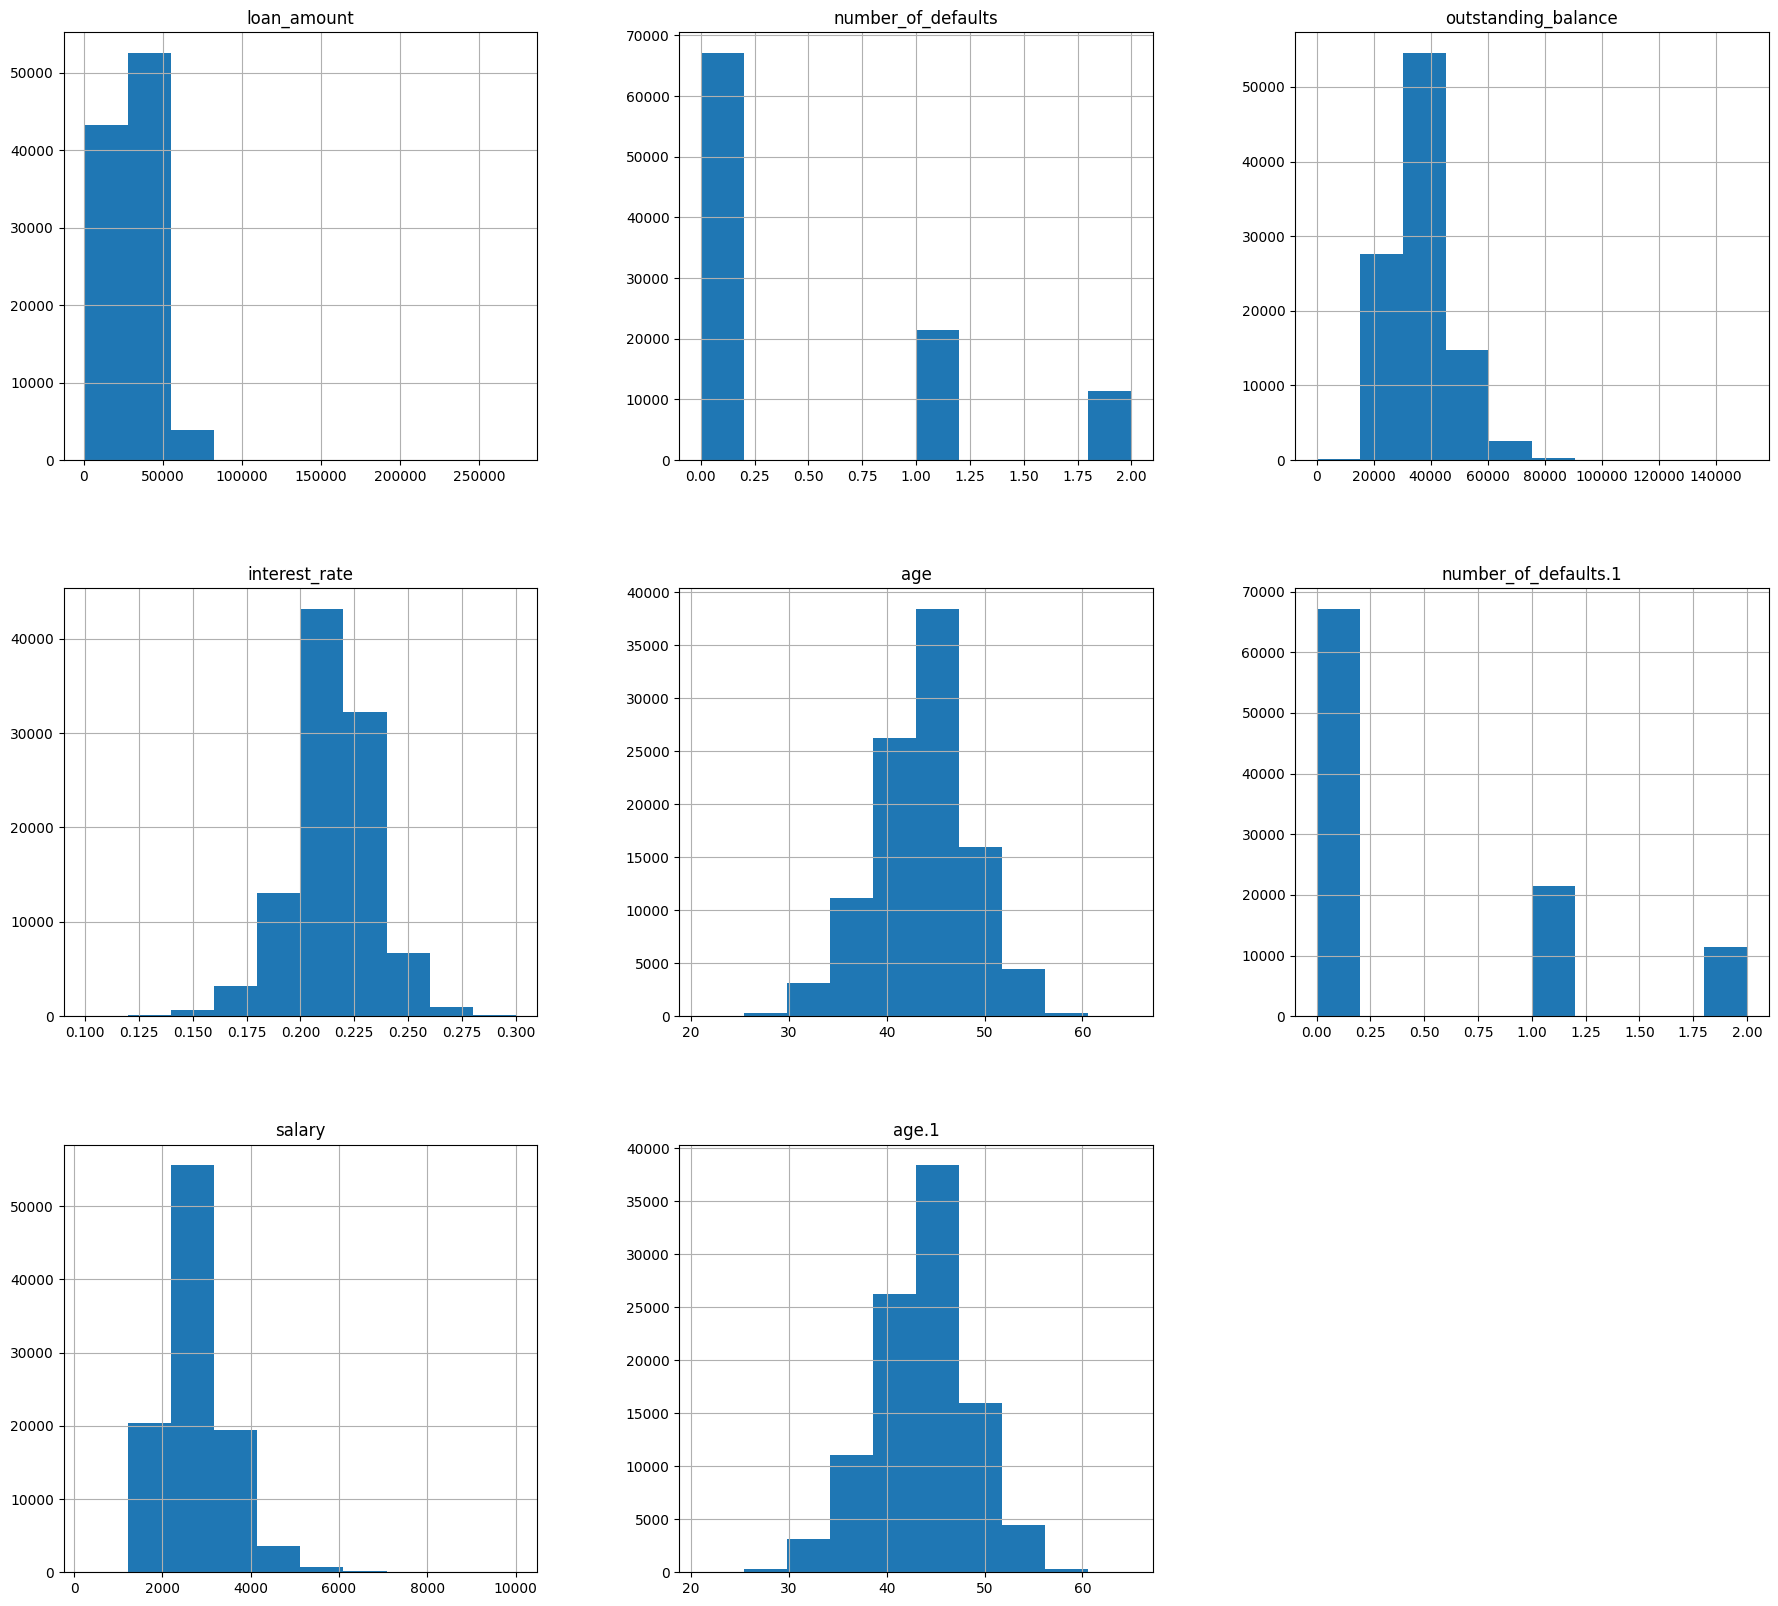

In [10]:
df.hist(figsize=(22,20))
plt.show()


> Checking for missing values in our dataframe.



In [12]:
df.isnull().sum()

loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

In [14]:
#Target feature
df['Loan Status'].value_counts()

Loan Status
Did not default    85134
Defaulted          14866
Name: count, dtype: int64

> Checking the balance on Loan status.

>The imbalance is observed here , as the defaults and non-default are proportionaly have big difference which leads to model predicting better on non defaults but missing a lot on defaults(minority bias).

>First 5 entries.

In [15]:
df.head(5)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


> Checking if we are dealing with same currency?

In [16]:
count_currency = df['currency']
print(count_currency.nunique())

2


>As they are two non unique values then lets see what is the other currency.

In [17]:
df_with_other_mask= df['currency']!='USD'
df_with_other_currency= df[df_with_other_mask]
df_with_other_currency.shape
df_with_other_currency.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
1836,60c3b33d-6229-4501-a9b6-c5e92f25b8af,other,2023 09 07,$USD,Zimbabwe,other,True,Doctor,Kadoma,48000.0,0,39696.384099,0.22,49,0,45,2665.434835,married,49,Did not default
11227,6c5a5162-c21a-4bf2-8289-3926cc97a837,male,2020 01 01,$USD,Zimbabwe,male,True,Accountant,Marondera,15000.0,2,30100.462815,0.23,39,2,58,2586.125810,divorced,39,Did not default
12878,b99cffad-9ab3-4ddc-8fd3-0cbe5d658ea1,male,2020 07 05,$USD,Zimbabwe,male,True,Doctor,Redcliff,40000.0,0,33016.316831,0.20,38,0,34,2059.155842,,38,Did not default
22301,a43b2f77-2232-4c06-921a-f542fecaff9a,male,2020 05 30,$USD,Zimbabwe,male,True,Doctor,Masvingo,15000.0,0,26227.698479,0.22,38,0,51,2398.910557,divorced,38,Did not default
23224,dfa97ba9-7113-4392-a714-7ec18292ed78,other,2023 10 02,$USD,Zimbabwe,other,True,Software Developer,Rusape,34000.0,0,39024.389403,0.23,40,0,46,2572.715465,divorced,40,Did not default
